<a href="https://colab.research.google.com/github/Super-rookie-Py/ai/blob/main/g_26_MNIST_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

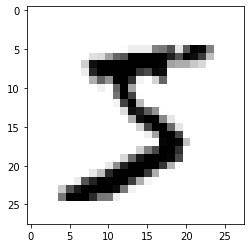

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [ ]:
train_images.shape

(60000, 28, 28)

- 3차원 shape ( 60000, 28, 28 )
- MLP에서는 인풋값으로 벡터의 값만 받는다.

In [ ]:
train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## MLP 로 구현(케라스 사용)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.2734 - accuracy: 0.9211
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1176 - accuracy: 0.9645
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0860 - accuracy: 0.9744
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0665 - accuracy: 0.9798
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9838


In [ ]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9763
test_acc =  0.9763000011444092


- 원래는 이미지 처리에는 MLP를 쓰지 않는다. 성능이 좋게나온 이유는 규격화된 이미지를 학습시켜놓았기 때문

## CNN 모델 생성

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 훈련

In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_cnn = train_images.reshape(-1, 28, 28, 1)

In [ ]:
train_images_cnn.shape

(60000, 28, 28, 1)

In [ ]:
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
model.fit(train_images_cnn, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 7s 8ms/step - loss: 0.3942 - accuracy: 0.9357
Epoch 2/3
938/938 [==============================] - 7s 7ms/step - loss: 0.0629 - accuracy: 0.9819
Epoch 3/3
938/938 [==============================] - 7s 7ms/step - loss: 0.0464 - accuracy: 0.9872


In [ ]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0476 - accuracy: 0.9858
test_acc =  0.98580002784729
